# PROJECT : 
## TELECOM CHURN CASE STUDY
To build predictive models for identifying customers at __high risk of churn__ in the telecom industry and for identifying the __main indicators of churn__.<br>

## PROBLEM STATEMENT :
In the __telecom industry__, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunication industry experiences an average of __15-25% annual churn rate__. Given the fact that it costs __5-10 times__ more to acquire a new customer than to retain an existing one, __customer retention__ has now become even more important than customer acquisition.<br>

For this purpose, the company wants to understand the __factors influencing the churn rate__ and so they should know:
> - __Which variables are more significant in influencing the churn rate?__<br>
> - __How well these variables influence the churn rate?__<br>

### BUSINESS GOAL : 
For many incumbent operators, __retaining high profitable customers__ is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at __high risk of churn__. In this project, we will __analyze__ customer-level data of a leading telecom firm, __build predictive models__ to identify customers at high risk of churn.<br>
### Major parts of the project : 
>1. Data understanding
>2. Data cleaning 
>> a. Fixing missing values<br>
>> b. Fixing rows and columns<br>
>> c. Standardizing values<br>
>> d. Fixing Invalid values<br>
>> e. Feature Engineering<br>
>> f. Treating outliers<br>
>3. Exploratory Data Analysis (EDA) 
>4. Model Building
>> a. Handling class imbalance in the data<br>
>> b. Model Building :<br>
>>>> - Model 1 : Basic Logistic Regression model using RFE<br>
>>>> - Model 2 : Logistic Regression with PCA components (optimal number = 18)<br>
>>>> - Model 3 : Logistic Regression with PCA components (90% variance explained using 52 components)<br>
>>>> - Model 4 : Random Forest model with tuned hyper parameters<br>
>>>> - Model 5 : Random Forest model using 18 PCA components with tuned hyper parameters<br>
>>>> - Model 6 : Basic XGBoost classifier model without any tuned hyper parameters<br>
>>>> - Model 7 : XGBoost classifier model with tuned hyper parameters<br>
>>>> - Model 8 : XGBoost classifier model using 18 PCA components without tuned parameters<br>
>>>> - Model 9 : XGBoost classifier model using 18 PCA components with tuned hyper parameters<br>
>4. Interpretation of results

## Import required libraries

In [1]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
import sklearn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import xgboost as xg_boost 
from sklearn.metrics import plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve

## 1. DATA UNDERSTANDING

### Read the "Telecom Churn" dataset

In [2]:
# Reading the dataset

telecom_df = pd.read_csv("train (1).csv")

In [3]:
# First 5 records of the dataset

telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### Shape of the dataset (rows,columns)

In [4]:
telecom_df.shape

(69999, 172)

In [5]:
# Get the column names of the dataset

set(telecom_df)

{'aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'churn_probability',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'id',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t

In [6]:
'''
We can see that the columns 'jul_vbc_3g','jun_vbc_3g','aug_vbc_3g' are different from the regular standard 
of naming columns with month at the end. So lets rename those columns according to the standard naming used here.
'''
telecom_df = telecom_df.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8'})
print(telecom_df.columns)

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'churn_probability'], dtype='object', length=172)


#### Acronyms of feature names and their intended meanings
- __CIRCLE_ID__: Telecom circle area to which the customer belongs to
- __LOC__: Local calls  within same telecom circle
- __STD__: STD calls  outside the calling circle
- __IC__: Incoming calls
- __OG__: Outgoing calls
- __T2T__: Operator T to T ie within same operator mobile to mobile
- __T2M__: Operator T to other operator mobile
- __T2O__: Operator T to other operator fixed line
- __T2F__: Operator T to fixed lines of T
- __T2C__: Operator T to its own call center
- __ARPU__: Average revenue per user
- __MOU__: Minutes of usage  voice calls
- __AON__: Age on network  number of days the customer is using the operator T network
- __ONNET__: All kind of calls within the same operator network
- __OFFNET__: All kind of calls outside the operator T network
- __ROAM__: Indicates that customer is in roaming zone during the call
- __SPL__: Special calls
- __ISD__: ISD calls
- __RECH__: Recharge
- __NUM__: Number
- __AMT__: Amount in local currency
- __MAX__: Maximum
- __DATA__: Mobile internet
- __3G__: 3G network
- __AV__: Average
- __VOL__: Mobile internet usage volume in MB
- __2G__: 2G network
- __PCK__: Prepaid service schemes called  PACKS
- __NIGHT__: Scheme to use during specific night hours only
- __MONTHLY__: Service schemes with validity equivalent to a month
- __SACHET__: Service schemes with validity smaller than a month
- __*.6__: KPI for the month of June
- __*.7__: KPI for the month of July
- __*.8__: KPI for the month of August
- __FB_USER__: Service scheme to avail services of Facebook and similar social networking sites
- __VBC__: Volume based cost  when no specific scheme is not purchased and paid as per usage


### Basic information of the dataset

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


__Inference - There are 172 columns in the dataset out of which (135 float + 28 int) = 163 columns are numerical and 9 columns are categorical.__

### Description of the dataset

In [8]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999

__TARGET VARIABLE in our case study : churn_probability__<br>
- It contains the binary values __0__ and __1__ indicating whether the customer has __churned(1)__ or __not churned(0)__.

## 2. DATA CLEANING 

### a. Fixing missing values

In [9]:
# Number of missing values in the given dataset

telecom_df.isnull().sum().sum()

1835086

In [10]:
# Check for missing values in the target variable

telecom_df['churn_probability'].isnull().sum()

0

__Inference - There is no missing values in the target variable.__

In [11]:
# Percentage of missing values in each column 

round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2).sort_values(ascending=False)

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

In [12]:
'''
The columns that possess more than 50% missing values are insignificant and may distort the analysis.
So drop the columns that has more than 50% missing values.
'''

telecom_df = telecom_df.dropna(axis=1,thresh=int(len(telecom_df.index)/2))

In [13]:
# Shape of the dataset after dropping columns that has larger number of missing values

telecom_df.shape

(69999, 142)

__Inference - 30 columns have more than 50% missing values and hence are dropped from the dataset.__

In [14]:
# Percentage of missing values in each column

round(100*(telecom_df.isnull().sum()/len(telecom_df.index)), 2).sort_values(ascending=False)

roam_og_mou_8           5.29
og_others_8             5.29
spl_og_mou_8            5.29
loc_ic_t2t_mou_8        5.29
loc_og_t2m_mou_8        5.29
loc_og_t2c_mou_8        5.29
loc_ic_t2m_mou_8        5.29
loc_og_t2t_mou_8        5.29
loc_ic_t2f_mou_8        5.29
std_og_t2f_mou_8        5.29
loc_ic_mou_8            5.29
isd_og_mou_8            5.29
roam_ic_mou_8           5.29
std_ic_t2t_mou_8        5.29
loc_og_mou_8            5.29
offnet_mou_8            5.29
std_ic_t2m_mou_8        5.29
onnet_mou_8             5.29
std_ic_t2f_mou_8        5.29
std_og_mou_8            5.29
std_ic_t2o_mou_8        5.29
std_og_t2t_mou_8        5.29
std_ic_mou_8            5.29
spl_ic_mou_8            5.29
std_og_t2c_mou_8        5.29
isd_ic_mou_8            5.29
std_og_t2m_mou_8        5.29
ic_others_8             5.29
loc_og_t2f_mou_8        5.29
isd_og_mou_6            3.95
spl_og_mou_6            3.95
std_og_mou_6            3.95
loc_ic_t2f_mou_6        3.95
loc_ic_t2t_mou_6        3.95
loc_ic_t2m_mou

In [15]:
# Total number of missing value columns and the total number of missing values in the dataframe

count_of_missing_val_cols = 0
for col in telecom_df.columns:
    if(telecom_df[col].isnull().sum()!=0.0):
        missing_val_percentage = round(100*(telecom_df[col].isnull().sum()/len(telecom_df.index)), 2)
        count_of_missing_val_cols = count_of_missing_val_cols+1
        #print("The column ",col," has {} % missing values".format(missing_val_percentage))
print("The number of columns that contain missing values are : {}".format(count_of_missing_val_cols))
print("Total number of missing values are : ",telecom_df.isnull().sum().sum())

The number of columns that contain missing values are : 95
Total number of missing values are :  273616


In [16]:
# 'df1' contains columns that have more than 5% missing values
# 'df2' contains columns that have less than 5% missing values

df1 = telecom_df.loc[:, (100*telecom_df.isnull().sum()/len(telecom_df.index)) > 5.0]
df2 = telecom_df.loc[:, (((100*telecom_df.isnull().sum()/len(telecom_df.index)) < 5.0)&
                         ((100*telecom_df.isnull().sum()/len(telecom_df.index)) != 0.0))]
print(df1.shape,df2.shape)

(69999, 29) (69999, 66)


#### Inference :
__Lets drop the corresponding rows containing more than 5% missing value columns. As there are more number of columns containing missing values lesser than 5%, lets impute those missing values using a multivariate imputer.__

In [17]:
# Deleting the corresponding missing value rows containing columns of more than 5% missing values

for column in df1.columns:
    telecom_df = telecom_df[~(telecom_df[column].isnull())]
telecom_df = telecom_df.reset_index()
del telecom_df['index']

In [18]:
# Shape of the dataframe after deleting missing value rows

telecom_df.shape

(66296, 142)

__Inference - 5.2% rows have been removed from the dataset.__

In [19]:
# Rechecking for missing values

telecom_df.isnull().sum().sum()

88023

In [20]:
'''
Since there are still more missing values present in the data frame, it is not advisable to drop the corresponding 
missing value rows or columns as a whole, as it may cause significant loss of data and information. 
Hence, we will impute these missing values using multivariate imputers from 'Scikit learn'.

'''
# Lets now check the number of numerical and categorical variables in the dataframe

numerical_variables_df = telecom_df.select_dtypes(include = ['float64','int64'])
categorical_variables_df = telecom_df.select_dtypes(include = ['object'])
print("Number of numerical columns : {}".format(len(numerical_variables_df.columns)))
print("Number of categorical columns : {}".format(len(categorical_variables_df.columns)))

Number of numerical columns : 136
Number of categorical columns : 6


In [21]:
# Lets check the categorical variables in the dataset

categorical_variables_df.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014


In [22]:
'''
All categorical variables are dates , so lets change the dtype to 'date' and retrieve the day from those dates.
Since 'year' and 'month' are explicitely known, we will derive only 'day' from the dates and drop the original date columns.

'''
for col in categorical_variables_df.columns:
    telecom_df[col] = pd.to_datetime(telecom_df[col], format='%m/%d/%Y')
    
telecom_df['last_day_of_month_6'] = telecom_df['last_date_of_month_6'].dt.day
telecom_df['last_day_of_month_7'] = telecom_df['last_date_of_month_7'].dt.day
telecom_df['last_day_of_month_8'] = telecom_df['last_date_of_month_8'].dt.day
telecom_df['day_of_last_rech_6'] = telecom_df['date_of_last_rech_6'].dt.day
telecom_df['day_of_last_rech_7'] = telecom_df['date_of_last_rech_7'].dt.day
telecom_df['day_of_last_rech_8'] = telecom_df['date_of_last_rech_8'].dt.day

telecom_df = telecom_df.drop(categorical_variables_df.columns, axis = 1)
print(telecom_df.shape)

(66296, 142)


In [23]:
# First 5 records of the dataframe

telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,30,31.0,31,22.0,10.0,24.0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,30,31.0,31,12.0,10.0,26.0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,30,31.0,31,11.0,22.0,24.0
3,3,109,0.0,0.0,0.0,156.362,205.260,

In [24]:
# Info of the dataset

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66296 entries, 0 to 66295
Columns: 142 entries, id to day_of_last_rech_8
dtypes: float64(112), int64(30)
memory usage: 71.8 MB


__Inference - Now all features are numerical in the dataset.__

In [25]:
# Lets keep the target variable separately in 'telecom_y'

telecom_X = telecom_df.drop("churn_probability", axis =1)
telecom_y = telecom_df['churn_probability']

In [26]:
'''
- Lets now impute the remaining missing values in the data frame.
- Here, 'KNNImputer' from 'Scikit Learn' is used to impute missing values for numerical features.
- It is used to fill out or predict the missing values in a dataset. 
- It is a more useful method which works on the basic approach of the KNN algorithm rather than the 
  naive approach of filling all the values with mean or the median. 
- In this approach, we specify a distance from the missing values which is also known as the 'K' parameter. 
- The missing value will be predicted in reference to the mean of the neighbours.

'''
# Create an object for KNNImputer

imputer = KNNImputer(n_neighbors = 2)

In [27]:
# Fit and Transform the imputer on numerical predictors

imputed_df = pd.DataFrame(imputer.fit_transform(telecom_X), columns = telecom_X.columns)

In [28]:
# First 5 records of the 'imputed_df'

imputed_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
0,0.0,109.0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,30.0,31.0,31.0,22.0,10.0,24.0
1,1.0,109.0,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,710.0,0.0,0.0,0.0,30.0,31.0,31.0,12.0,10.0,26.0
2,2.0,109.0,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,70.0,50.0,0.0,0.0,0.00,

In [29]:
# Now lets recheck for the number of missing values after imputation

imputed_df.isnull().sum().sum()

0

__Inference - There is no missing values present in the data frame after imputation using 'KNNImputer'.__

In [30]:
# Drop the old numerical features and concatenate the imputed dataframe

telecom_df = pd.concat([imputed_df, telecom_y], axis = 1)
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,churn_probability
0,0.0,109.0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,30.0,31.0,31.0,22.0,10.0,24.0,0
1,1.0,109.0,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,710.0,0.0,0.0,0.0,30.0,31.0,31.0,12.0,10.0,26.0,0
2,2.0,109.0,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,7

In [31]:
# Shape of the dataframe after imputation

telecom_df.shape

(66296, 142)

### b. Fixing rows and columns

In [32]:
# Checking for duplicate rows

telecom_df.duplicated().sum()

0

__Inference - There are no duplicate rows available in the dataset.__

In [33]:
# Analysing the unique values of each columns in the dataframe 

telecom_df.apply(lambda x : x.unique())

id                     [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
circle_id                                                        [109.0]
loc_og_t2o_mou                                                     [0.0]
std_og_t2o_mou                                                     [0.0]
loc_ic_t2o_mou                                                     [0.0]
arpu_6                 [31.277, 0.0, 60.806, 156.362, 240.708, 86.193...
arpu_7                 [87.009, 122.787, 103.176, 205.26, 128.191, 83...
arpu_8                 [7.527, 42.953, 0.0, 111.095, 101.565, 88.462,...
onnet_mou_6            [48.58, 0.0, 0.53, 7.26, 21.28, 1.39, 38.81, 2...
onnet_mou_7            [124.38, 0.0, 15.93, 16.01, 4.83, 1.78, 40.56,...
onnet_mou_8            [1.29, 0.0, 6.13, 0.45, 19.61, 53.38, 177.36, ...
offnet_mou_6           [32.24, 0.0, 53.99, 68.76, 56.99, 17.14, 31.63...
offnet_mou_7           [96.68, 25.99, 82.05, 78.48, 38.11, 24.26, 54....
offnet_mou_8           [2.33, 30.89, 0.0, 50.23, 9.

In [34]:
# As we can see many columns contain same values for all the rows.
# Such columns are not significant for analysis and hence we shall drop these columns.

telecom_df = telecom_df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                             'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
                             'last_day_of_month_6','last_day_of_month_7','last_day_of_month_8'], axis = 1)

In [35]:
# Lets drop the column 'id' also as it has no significance in analysis

telecom_df = telecom_df.drop("id", axis = 1)

In [36]:
# Shape of the dataframe after removing insignificant columns

telecom_df.shape

(66296, 128)

### c. Standardizing values

In [37]:
# Round off float values to 2 decimal places

float_variables = telecom_df.select_dtypes(include = ['float64'])
for col in float_variables:
    telecom_df[col] = telecom_df[col].apply(lambda x : round(x,2))

In [38]:
# Change the dtype of days from 'float' to 'int'

telecom_df[['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']] = telecom_df[['day_of_last_rech_6',
                                                      'day_of_last_rech_7','day_of_last_rech_8']].astype('int64')

__Inference - Now all the values are standardized.__

### d. Fixing Invalid values

In [39]:
# Description of variables - to check basic validity

telecom_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,churn_probability
count,66296.000000,66296.000000,66296.000000,66296.000000,66296.00000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.00000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000
mean,282.155710,286.307074,292.550879,129.013410,134.19380,132.978257,193.828395,197.658082,196.543577,9.483808,6.969103,7.004892,13.802340,9.761883,9.771783,46.441017,46.561595,45.686109,92.184264,91.415128,91.121447,3.723340,3.808289,3.661652,1.110359,1.356555,1.420840,142.355910,141.792407,140.476486,77.128248,83.717602,83.471486,84.534529,91.445130,90.586999,1.112074,1.089076,1.057739,162.777518,176.254494,175.118852,0.764863,0.789753,0.841648,3.854949,4.975788,5.045027,0.4

__Inference - As we can see, there are no invalid values to handle.__

### e. Feature Engineering

In [40]:
'''
High-value customers are to be identified from the given data so that the company knows whether these high-value customers
will churn or not, in near future (i.e. churn phase). 
By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

These customers can be found out from the mean value of total recharge amount corresponding to the months 
june, july and august. For higher values of this mean, customers are valued high (here we use quantile(0.75) as threshold).

'''
thresh_high_value_cust = telecom_df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean().quantile(0.75)

#print(thresh_high_value_cust)

telecom_df['high_value_customers'] = (telecom_df[['total_rech_amt_6','total_rech_amt_7',
           'total_rech_amt_8']].mean(axis=1)).apply(lambda x : 0 if (x < thresh_high_value_cust) else 1)
#telecom_df['high_value_customers']

In [41]:
# First 5 records of the dataframe after adding the column 'high_value_customers'

telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,churn_probability,high_value_customers
0,31.28,87.01,7.53,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,22,10,24,0,0
1,0.00,122.79,42.95,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,710.0,0.0,0.0,0.0,12,10,26,0,0
2,60.81,103.18,0.00,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,70.0,50.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,11,22,24,0,0
3,156.36,205.26,111.09,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,

In [42]:
telecom_before_scaling = telecom_df.copy()

### f. Treating Outliers

In [43]:
# Description of variables with various quantile values to check for outliers

telecom_df.describe([0.01,0.02,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,churn_probability,high_value_customers
count,66296.000000,66296.000000,66296.000000,66296.000000,66296.00000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.00000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000,66296.000000
mean,282.155710,286.307074,292.550879,129.013410,134.19380,132.978257,193.828395,197.658082,196.543577,9.483808,6.969103,7.004892,13.802340,9.761883,9.771783,46.441017,46.561595,45.686109,92.184264,91.415128,91.121447,3.723340,3.808289,3.661652,1.110359,1.356555,1.420840,142.355910,141.792407,140.476486,77.128248,83.717602,83.471486,84.534529,91.445130,90.586999,1.112074,1.089076,1.057739,162.777518,176.254494,175.118852,0.764863,0.789753,0.841

In [44]:
# Lets fit and transform the standard scaler on the predictor variables for 

X_train = telecom_df.drop("churn_probability", axis = 1)
cols = X_train.columns
y_train = telecom_df['churn_probability']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)
telecom_df = pd.concat([X_train,y_train], axis = 1)
telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers,churn_probability
0,-0.760631,-0.572502,-0.801519,-0.273604,-0.031454,-0.422221,-0.518933,-0.312848,-0.599264,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.295526,-0.299334,-0.295390,-0.539319,-0.489059,-0.580349,-0.279959,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,-0.537631,-0.508839,-0.561939,-0.123679,0.152185,-0.308821,-0.264084,-0.040475,-0.335470,-0.138352,-0.13045,-0.137426,-0.255195,0.070098,-0.423938,-0.026143,-0.026963,-0.02847,0.276964,-0.194875,-0.284895,-0.012994,-0.013916,-0.014808,-0.489046,-0.208012,-0.654772,-0.325225,-0.301670,-0.279411,-0.635852,-0.519695,-0.548932,-0.305400,-0.289840,-0.303491,-0.653491,-0.562756,-0.571338,-0.180000,-0.040295,-0.178813,-0.163426,-0.020854,-0.075172,-0.129587,-0.136644,-0.1308,-0.236129,-0.055115,-0.164997,-0.665030,-0.523812,-0.578156,-0.376428,-0.244994,4.174814,-0.118045,-0.127726,-0.132311,0.022734,-0.025482,-0.082343,-0.655187,-0.831325,-0.764481,-0.626706,-0.644511,-0.765344,-0.325772,-0.344601,-0.821866,0.016977,0.043564,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.745571,-0.259275,-0.248066,-0.233004,-0.364985,-2.819523,-0.264329,-0.729897,0
1,-0.855469,-0.469720,-0.701913,-0.438855,-0.430098,-0.426357,-0.622471,-0.531859,-0.511140,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.310433,-0.299334,-0.297212,-0.572152,-0.593131,-0.595578,-0.279959,-0.279330,-0.281469,-0.194192,2.615343,4.336365,-0.567658,-0.573742,-0.572578,-0.309832,-0.313326,-0.312604,-0.339354,-0.341598,-0.335470,-0.138352,-0.13045,-0.137426,-0.425234,-0.429961,-0.426397,-0.026143,-0.026963,-0.02847,-0.245724,1.154877,1.502960,-0.095473,-0.013916,-0.014808,-0.664077,-0.601087,-0.597038,-0.330650,-0.197045,-0.260013,-0.632345,-0.534162,-0.583946,-0.296470,-0.251828,-0.215423,-0.652766,-0.505110,-0.570054,-0.180000,-0.175399,-0.182684,-0.259488,-0.248741,-0.258654,-0.129587,-0.136644,-0.1308,-0.309409,-0.295925,-0.304944,-0.694202,-0.569094,-0.631246,-0.376428,-0.244994,-0.204773,-0.118045,-0.127726,-0.13231

In [45]:
# Lets use Z-Scores for removing outliers

for col in telecom_df.columns:
    if(col!="churn_probability"):
        scaled_values = telecom_df[col]
        low_range = np.array(scaled_values).argsort()[:5]         # Filter the first 5 sorted & scaled values
        high_range = np.array(scaled_values).argsort()[-5:]       # Filter the first 5 sorted & scaled values
        
        if(abs(low_range.mean())>abs(high_range.mean())):                   # Fix threshold to compare with z-scores
            threshold = abs(low_range.mean())
        else:
            threshold = abs(high_range.mean())

        z_scores = stats.zscore(scaled_values)                              # Calculate z-scores for the column
        abs_z_scores = np.abs(z_scores)                                     # Take absolute value of z-scores
        telecom_df['Z-Scores'] = abs_z_scores                               # Update the z-score in 'Z-Scores' column
        telecom_df = telecom_df[telecom_df['Z-Scores'] <= threshold]        # Remove outliers greater than threshold

In [46]:
# Lets drop the column 'Z-Scores' as it is no longer significant for analysis

telecom_df = telecom_df.drop("Z-Scores", axis = 1)

# Reset index for telecom_df

telecom_df = telecom_df.reset_index()
del telecom_df['index']

In [47]:
# Shape of the dataframe after removing outliers

telecom_df.shape

(66296, 129)

In [48]:
# First 5 records of the dataframe

telecom_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers,churn_probability
0,-0.760631,-0.572502,-0.801519,-0.273604,-0.031454,-0.422221,-0.518933,-0.312848,-0.599264,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.295526,-0.299334,-0.295390,-0.539319,-0.489059,-0.580349,-0.279959,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,-0.537631,-0.508839,-0.561939,-0.123679,0.152185,-0.308821,-0.264084,-0.040475,-0.335470,-0.138352,-0.13045,-0.137426,-0.255195,0.070098,-0.423938,-0.026143,-0.026963,-0.02847,0.276964,-0.194875,-0.284895,-0.012994,-0.013916,-0.014808,-0.489046,-0.208012,-0.654772,-0.325225,-0.301670,-0.279411,-0.635852,-0.519695,-0.548932,-0.305400,-0.289840,-0.303491,-0.653491,-0.562756,-0.571338,-0.180000,-0.040295,-0.178813,-0.163426,-0.020854,-0.075172,-0.129587,-0.136644,-0.1308,-0.236129,-0.055115,-0.164997,-0.665030,-0.523812,-0.578156,-0.376428,-0.244994,4.174814,-0.118045,-0.127726,-0.132311,0.022734,-0.025482,-0.082343,-0.655187,-0.831325,-0.764481,-0.626706,-0.644511,-0.765344,-0.325772,-0.344601,-0.821866,0.016977,0.043564,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.745571,-0.259275,-0.248066,-0.233004,-0.364985,-2.819523,-0.264329,-0.729897,0
1,-0.855469,-0.469720,-0.701913,-0.438855,-0.430098,-0.426357,-0.622471,-0.531859,-0.511140,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.310433,-0.299334,-0.297212,-0.572152,-0.593131,-0.595578,-0.279959,-0.279330,-0.281469,-0.194192,2.615343,4.336365,-0.567658,-0.573742,-0.572578,-0.309832,-0.313326,-0.312604,-0.339354,-0.341598,-0.335470,-0.138352,-0.13045,-0.137426,-0.425234,-0.429961,-0.426397,-0.026143,-0.026963,-0.02847,-0.245724,1.154877,1.502960,-0.095473,-0.013916,-0.014808,-0.664077,-0.601087,-0.597038,-0.330650,-0.197045,-0.260013,-0.632345,-0.534162,-0.583946,-0.296470,-0.251828,-0.215423,-0.652766,-0.505110,-0.570054,-0.180000,-0.175399,-0.182684,-0.259488,-0.248741,-0.258654,-0.129587,-0.136644,-0.1308,-0.309409,-0.295925,-0.304944,-0.694202,-0.569094,-0.631246,-0.376428,-0.244994,-0.204773,-0.118045,-0.127726,-0.13231

__Inference - Thus, we obtained standardized data without any outliers.__

## 3. Exploratory Data Analysis (EDA)

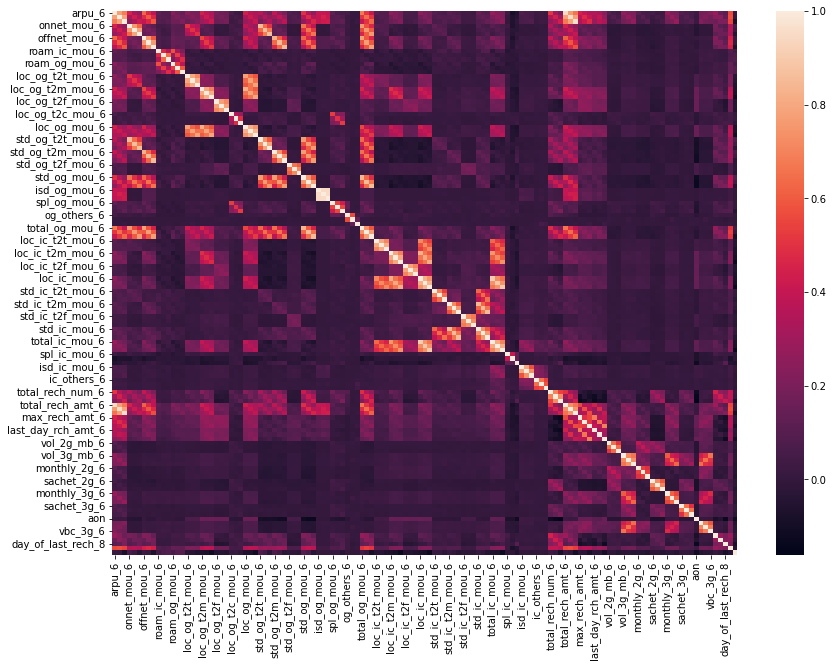

In [49]:
# Analysing correlation using heatmap

plt.figure(figsize=(14,10))
sns.heatmap(telecom_df.corr())
plt.show()

#### Inference :
__From the heatmap, it is evident that some of the predictors are redundant and hence highly correlated. Lets resolve this by analysing the correlated values among these variables.__

In [50]:
# Correlation matrix 

correlation = telecom_df.corr()
#correlation 

In [51]:
# Create a dataframe of highly correlated variables (filtering variables having correlation > 0.8)

highly_corr_var1 = []
highly_corr_var2 = []
highly_corr_value = []
for col in correlation.columns:
    count = 0
    for value in correlation[col]:
        if((abs(value) > 0.8) & (value != 1.0)):
            highly_corr_var1.append(correlation.index[count])
            highly_corr_var2.append(col)
            highly_corr_value.append(value)
        count = count+1

highly_corr_variables = pd.DataFrame({'Variable_1' : highly_corr_var1, 'Variable_2' : highly_corr_var2, 
                                      'Correlated_Value' : highly_corr_value})

highly_corr_variables

,Variable_1,Variable_2,Correlated_Value
0,total_rech_amt_6,arpu_6,0.952294
1,total_rech_amt_7,arpu_7,0.955729
2,total_rech_amt_8,arpu_8,0.957823
3,std_og_t2t_mou_6,onnet_mou_6,0.852280
4,std_og_t2t_mou_7,onnet_mou_7,0.861335
5,std_og_t2t_mou_8,onnet_mou_8,0.862759
6,std_og_t2m_mou_6,offnet_mou_6,0.827439
7,std_og_t2m_mou_7,offnet_mou_7,0.855530
8,std_og_t2m_mou_8,offnet_mou_8,0.858002
9,loc_og_t2t_mou_7,loc_og_t2t_mou_6,0.800747


In [52]:
# Lets drop the redundant variables in the dataframe so that we can resolve multicollinearity issue while building models

telecom_df = telecom_df.drop(['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6',
                              'offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                              'loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','std_og_mou_6','std_og_mou_7','std_og_mou_8',
                              'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_t2m_mou_7','std_ic_mou_6','std_ic_mou_7',
                              'std_ic_mou_8','total_ic_mou_7','loc_ic_t2t_mou_7','isd_og_mou_6','isd_og_mou_8'], axis = 1)

In [53]:
# Shape of the dataframe after dropping redundant variables

telecom_df.shape

(66296, 100)

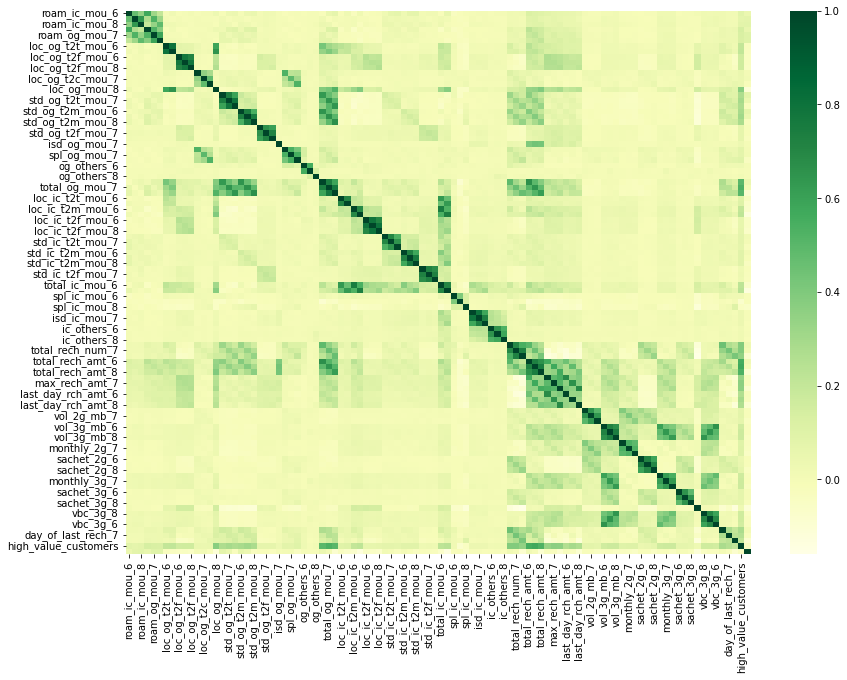

In [54]:
# Analysing correlation using heatmap after dropping redundant variables from the dataframe

plt.figure(figsize=(14,10))
sns.heatmap(telecom_df.corr(), cmap = "YlGn")
plt.show()

#### Inference  :
__Now, the heatmap shows that most of the predictors are uncorrelated except the diagonal elements where the values vary only a little for consequent months.__

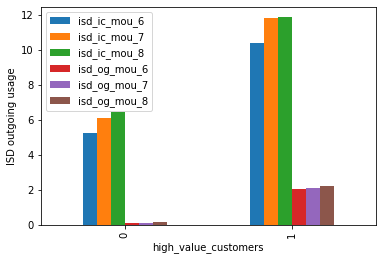

In [55]:
# Let us now use the dataframe that we had before scaling for the purpose of EDA
# Lets check and compare the ISD outgoing usage of the high-value customers with the normal customers using barplots

telecom_before_scaling.groupby('high_value_customers')['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_og_mou_6',
                                   'isd_og_mou_7','isd_og_mou_8'].mean().plot(kind='bar',ylabel='ISD outgoing usage')
plt.show()

#### Inference - The high-value customers seem to use ISD outgoing calls considerably higher than the normal customers.

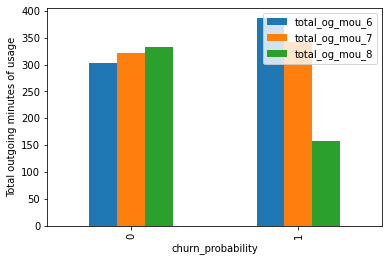

In [56]:
# Lets check and compare the total outgoing minutes of usage for the months of 'june','july' and 'august' using barplots

telecom_before_scaling.groupby('churn_probability')['total_og_mou_6','total_og_mou_7',
                                                    'total_og_mou_8'].mean().plot(kind='bar',
                                                    ylabel='Total outgoing minutes of usage')
plt.show()

#### Inference :
__The total outgoing minutes of usage has reduced month-by-month for the churned customers. On the other hand, total outgoing usage has increased month-by-month for non-churned customers.__

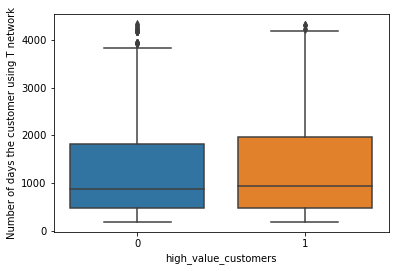

In [57]:
# Check and compare high-value customers with the normal ones using the number of days the customers using T network

sns.boxplot(y='aon', x='high_value_customers', data=telecom_before_scaling)
plt.ylabel('Number of days the customer using T network')
plt.show()

#### Inference - The high value customers seem to use the T network for a quite longer duration than the normal customers.

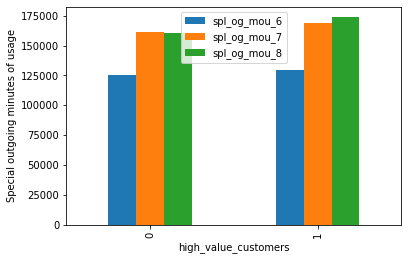

In [58]:
# Check the special outgoing minutes of usage associated with high-value customers for the months of 'june','july'&'august'

telecom_before_scaling.groupby('high_value_customers')['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum().plot(kind='bar',
                                                                                ylabel='Special outgoing minutes of usage')
plt.show()

#### Inference - As we can see that high-value customers use relatively more special outgoing calls than the normal ones.

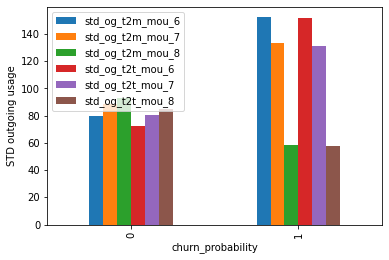

In [59]:
# Check and compare the STD outgoing usage for customers those who have churned and not churned 

telecom_before_scaling.groupby('churn_probability')['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                                                    'std_og_t2t_mou_6','std_og_t2t_mou_7',
                                                    'std_og_t2t_mou_8'].mean().plot(kind='bar',ylabel='STD outgoing usage')
plt.show() 

#### Inference :
__The STD outgoing usage is seen more among the churned customers as they try to finish off the recharged balance amount with the STD calls.__

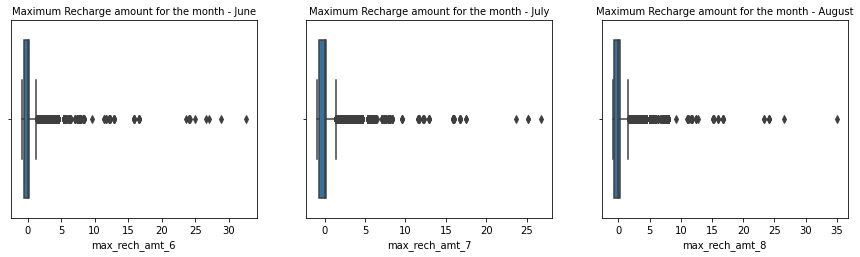

In [60]:
# Using boxplots, lets check and compare the maximum recharge amount for the months of 'june','july' & 'august'

plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(telecom_df['max_rech_amt_6'])
ax.set_title('Maximum Recharge amount for the month - June',fontsize=10)
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(telecom_df['max_rech_amt_7'])
ax.set_title('Maximum Recharge amount for the month - July',fontsize=10)
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(telecom_df['max_rech_amt_8'])
ax.set_title('Maximum Recharge amount for the month - August',fontsize=10)
plt.show()

#### Inference :
__It is evident from the boxplots that as we move from 'june' to 'august', the maximum recharge amount declines.__

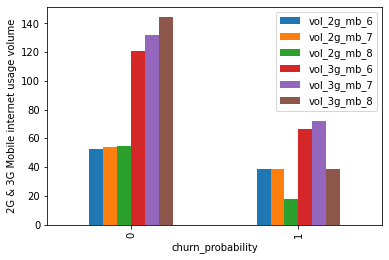

In [61]:
# Lets check the 2G & 3G Mobile internet usage volume for the churned and non-churned customers using barplots

telecom_before_scaling.groupby(['churn_probability'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6',
                                                      'vol_3g_mb_7','vol_3g_mb_8'].mean().plot(kind='bar',
                                                       ylabel='2G & 3G Mobile internet usage volume')
plt.show()

#### Inference - Non-churned customers use more volume of 2G or 3G mobile internet than the churned customers.

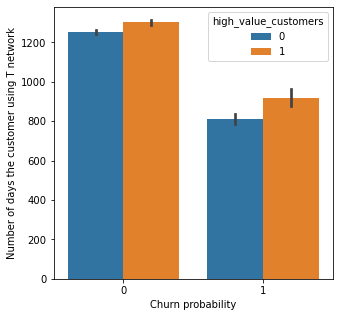

In [62]:
# Using barplots lets check the churn probability of high-valued customers with their associated AON

plt.figure(figsize=(5,5))
sns.barplot(x='churn_probability',y='aon',hue='high_value_customers',data = telecom_before_scaling)
plt.xlabel('Churn probability')
plt.ylabel('Number of days the customer using T network')
plt.show()

#### Inference :
__Non churned high-value customers seem to be associated with the network for longer duration than the churned normal customers.__

## 4. MODEL BUILDING

In [63]:
# First 5 records of the dataframe

telecom_df.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,total_ic_mou_6,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers,churn_probability
0,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.295526,-0.299334,-0.279959,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,-0.561939,-0.123679,0.152185,-0.308821,-0.264084,-0.040475,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,0.276964,-0.194875,-0.284895,-0.012994,-0.013916,-0.014808,-0.489046,-0.208012,-0.654772,-0.325225,-0.279411,-0.635852,-0.548932,-0.305400,-0.289840,-0.303491,-0.180000,-0.040295,-0.178813,-0.163426,-0.020854,-0.075172,-0.129587,-0.136644,-0.1308,-0.665030,-0.578156,-0.376428,-0.244994,4.174814,-0.118045,-0.127726,-0.132311,0.022734,-0.025482,-0.082343,-0.655187,-0.831325,-0.764481,-0.626706,-0.644511,-0.765344,-0.325772,-0.344601,-0.821866,0.016977,0.043564,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.745571,-0.259275,-0.248066,-0.233004,-0.364985,-2.819523,-0.264329,-0.729897,0
1,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.310433,-0.299334,-0.279959,-0.279330,-0.281469,-0.194192,2.615343,4.336365,-0.572578,-0.309832,-0.313326,-0.312604,-0.339354,-0.341598,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,-0.245724,1.154877,1.502960,-0.095473,-0.013916,-0.014808,-0.664077,-0.601087,-0.597038,-0.330650,-0.260013,-0.632345,-0.583946,-0.296470,-0.251828,-0.215423,-0.180000,-0.175399,-0.182684,-0.259488,-0.248741,-0.258654,-0.129587,-0.136644,-0.1308,-0.694202,-0.631246,-0.376428,-0.244994,-0.204773,-0.118045,-0.127726,-0.132311,-0.069161,-0.077344,-0.082343,-0.655187,-0.550020,-0.350786,-0.818960,-0.451828,-0.672578,-0.866876,0.325817,-0.499617,-0.655228,-0.638269,-0.632977,-0.243937,1.40123,-0.240675,-0.221448,-0.226470,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,2.416671,-0.2138,-0.129671,-0.128993,-0.127811,-0.556855,-0.259275,-0.248066,-0.233004,-2.022805,-2.819523,0.071459,-0.729897,0
2,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.306890,-0.215888,-0.279959,-0.279330,-0.281469,0.180075,-0.171780,-0.217182,-0.572578,-0.309832,-0.302322,-0.312604,-0.223178,-0.035096,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,-0.061508,-0.161243,-0.284895,-0.095473,-0.013916,-0.014808,-0.542325,-0.459810,-0.662249,-0.310180,-0.288615,-0.097467,-0.509226,-0.305400,-0.289840,-0.303491,0.048355,-0.175399,-0.182684,-0.025000,-0.220426,-0.180404,-0.129587,-0.136644,-0.1308,-0.274515,-0.591565,-0.376428,-0.244994,-0.272151,-0.118

In [64]:
# Shape of the dataframe

telecom_df.shape

(66296, 100)

### a. Handling class imbalance in the data

In [65]:
# Checking the Churn Rate

churn = (sum(telecom_df['churn_probability'])/len(telecom_df['churn_probability'].index))*100
churn

6.321648364908894

#### Inference :
__Only 6.32% of data contains churned records which is skewed more towards the non-churned data. <br>
Hence, we use SMOTE to balance the churn rate.__

In [66]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
# Define X_train, y_train

y_train = telecom_df['churn_probability']
X_train = telecom_df.drop("churn_probability", axis = 1)

In [68]:
# Perform oversampling using SMOTE

oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train, y_train)

In [69]:
# Create a new dataframe containing the balanced churn rate records

telecom = pd.concat([X_train_smo,y_train_smo], axis = 1)

In [70]:
# Shape of the dataframe after balancing classes using SMOTE

telecom.shape

(124210, 100)

In [71]:
# First 5 records of the balanced dataframe

telecom.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,total_ic_mou_6,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers,churn_probability
0,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.295526,-0.299334,-0.279959,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,-0.561939,-0.123679,0.152185,-0.308821,-0.264084,-0.040475,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,0.276964,-0.194875,-0.284895,-0.012994,-0.013916,-0.014808,-0.489046,-0.208012,-0.654772,-0.325225,-0.279411,-0.635852,-0.548932,-0.305400,-0.289840,-0.303491,-0.180000,-0.040295,-0.178813,-0.163426,-0.020854,-0.075172,-0.129587,-0.136644,-0.1308,-0.665030,-0.578156,-0.376428,-0.244994,4.174814,-0.118045,-0.127726,-0.132311,0.022734,-0.025482,-0.082343,-0.655187,-0.831325,-0.764481,-0.626706,-0.644511,-0.765344,-0.325772,-0.344601,-0.821866,0.016977,0.043564,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.745571,-0.259275,-0.248066,-0.233004,-0.364985,-2.819523,-0.264329,-0.729897,0
1,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.310433,-0.299334,-0.279959,-0.279330,-0.281469,-0.194192,2.615343,4.336365,-0.572578,-0.309832,-0.313326,-0.312604,-0.339354,-0.341598,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,-0.245724,1.154877,1.502960,-0.095473,-0.013916,-0.014808,-0.664077,-0.601087,-0.597038,-0.330650,-0.260013,-0.632345,-0.583946,-0.296470,-0.251828,-0.215423,-0.180000,-0.175399,-0.182684,-0.259488,-0.248741,-0.258654,-0.129587,-0.136644,-0.1308,-0.694202,-0.631246,-0.376428,-0.244994,-0.204773,-0.118045,-0.127726,-0.132311,-0.069161,-0.077344,-0.082343,-0.655187,-0.550020,-0.350786,-0.818960,-0.451828,-0.672578,-0.866876,0.325817,-0.499617,-0.655228,-0.638269,-0.632977,-0.243937,1.40123,-0.240675,-0.221448,-0.226470,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,2.416671,-0.2138,-0.129671,-0.128993,-0.127811,-0.556855,-0.259275,-0.248066,-0.233004,-2.022805,-2.819523,0.071459,-0.729897,0
2,-0.174056,-0.12491,-0.131159,-0.191723,-0.166462,-0.151224,-0.306890,-0.215888,-0.279959,-0.279330,-0.281469,0.180075,-0.171780,-0.217182,-0.572578,-0.309832,-0.302322,-0.312604,-0.223178,-0.035096,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,-0.061508,-0.161243,-0.284895,-0.095473,-0.013916,-0.014808,-0.542325,-0.459810,-0.662249,-0.310180,-0.288615,-0.097467,-0.509226,-0.305400,-0.289840,-0.303491,0.048355,-0.175399,-0.182684,-0.025000,-0.220426,-0.180404,-0.129587,-0.136644,-0.1308,-0.274515,-0.591565,-0.376428,-0.244994,-0.272151,-0.118

In [72]:
# Now lets recheck the Churn Rate

churn = (sum(telecom['churn_probability'])/len(telecom['churn_probability'].index))*100
churn

50.0

#### Inference :
__It is evident that the data available now in the dataset has equal proportion of records corresponding to churn and non-churn customers.__

### Let us now apply all the pre-processing steps to the test data which we already applied for the training data.

In [73]:
# Read the test dataset

telecom_test_df = pd.read_csv("test (1).csv")

In [74]:
# First 5 records of the test dataframe

telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [75]:
# Shape of the test dataframe

telecom_test_df.shape

(30000, 171)

In [76]:
# Info of the test dataset

telecom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [77]:
# Rename the columns as we did for train data

'''
We can see that the columns 'jul_vbc_3g','jun_vbc_3g','aug_vbc_3g' are different from the regular standard 
of naming columns with month at the end. So lets rename those columns according to the standard naming used here.
'''
telecom_test_df = telecom_test_df.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7',
                                                  'aug_vbc_3g':'vbc_3g_8'})

In [78]:
# Convert the dtype of categorical variables to 'date' and extract 'day' from those variables

for col in categorical_variables_df.columns:
    telecom_test_df[col] = pd.to_datetime(telecom_test_df[col], format='%m/%d/%Y')
    
telecom_test_df['last_day_of_month_6'] = telecom_test_df['last_date_of_month_6'].dt.day
telecom_test_df['last_day_of_month_7'] = telecom_test_df['last_date_of_month_7'].dt.day
telecom_test_df['last_day_of_month_8'] = telecom_test_df['last_date_of_month_8'].dt.day
telecom_test_df['day_of_last_rech_6'] = telecom_test_df['date_of_last_rech_6'].dt.day
telecom_test_df['day_of_last_rech_7'] = telecom_test_df['date_of_last_rech_7'].dt.day
telecom_test_df['day_of_last_rech_8'] = telecom_test_df['date_of_last_rech_8'].dt.day

telecom_test_df = telecom_test_df.drop(categorical_variables_df.columns, axis = 1)
print(telecom_test_df.shape)

(30000, 171)


In [79]:
# Columns selected in training data during the process of removing features containing high % of missing values

telecom_test_df = telecom_test_df[telecom_X.columns]

In [80]:
# Shape of the test dataframe 

telecom_test_df.shape

(30000, 141)

In [81]:
# Check the number of missing values in the test dataframe

telecom_test_df.isnull().sum().sum()

120181

In [82]:
# Transform the KNN imputer (which we fitted on the training data earlier) on the test data to impute missing values 

telecom_test_df = pd.DataFrame(imputer.transform(telecom_test_df), columns = telecom_test_df.columns)

In [86]:
# First 5 records of the test dataframe

telecom_test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,last_day_of_month_6,last_day_of_month_7,last_day_of_month_8,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
0,69999.0,109.0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5.0,5.0,4.0,103.0,90.0,60.0,50.0,30.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00,30.0,31.0,31.0,21.0,26.0,24.0
1,70000.0,109.0,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5.0,4.0,5.0,500.0,500.0,500.0,250.0,250.0,250.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00,30.0,31.0,31.0,19.0,16.0,24.0
2,70001.0,109.0,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [87]:
# After imputation, lets recheck the number of missing values in test dataframe

telecom_test_df.isnull().sum().sum()

0

In [88]:
# Assign 'id' to 'cust_id' for writing ID in output file later

cust_id = telecom_test_df['id']

In [89]:
# Drop the insignificant columns that we removed earlier from the training data

telecom_test_df = telecom_test_df.drop(['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                                        'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6',
                                        'std_ic_t2o_mou_7','std_ic_t2o_mou_8','last_day_of_month_6','last_day_of_month_7',
                                        'last_day_of_month_8'], axis = 1)

In [90]:
# Shape of the test dataframe after dropping insignificant columns

telecom_test_df.shape

(30000, 127)

In [91]:
# Round off float values to 2 decimal places

float_variables = telecom_test_df.select_dtypes(include = ['float64'])
for col in float_variables:
    telecom_test_df[col] = telecom_test_df[col].apply(lambda x : round(x,2))

In [92]:
# Change the dtype of days from 'float' to 'int'

telecom_test_df[['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']] = telecom_test_df[['day_of_last_rech_6',
                                                               'day_of_last_rech_7','day_of_last_rech_8']].astype('int64')

In [93]:
# Apply 'feature engineering' on the test data as well like the way we did it for training data
# Add a new column 'high_value_customers' to the test dataframe

thresh_high_value_cust = telecom_test_df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean().quantile(0.75)

telecom_test_df['high_value_customers'] = (telecom_test_df[['total_rech_amt_6','total_rech_amt_7',
           'total_rech_amt_8']].mean(axis=1)).apply(lambda x : 0 if (x < thresh_high_value_cust) else 1)

In [94]:
# Apply StandardScaler() on the test data as well
# Just transform the scaler object on the test data which we fitted earlier on the training data

cols = telecom_test_df.columns
telecom_test_df = scaler.transform(telecom_test_df)
telecom_test_df = pd.DataFrame(telecom_test_df, columns = cols)
telecom_test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers
0,-0.576897,-0.634780,-0.641480,-0.330751,-0.365260,-0.352261,-0.429270,-0.512743,-0.498982,-0.174056,-0.124910,-0.131159,-0.191723,-0.166462,-0.151224,-0.144124,-0.169280,-0.160206,-0.459626,-0.522474,-0.540936,-0.279959,0.716735,-0.281469,-0.194192,-0.171780,-0.212597,-0.396151,-0.392830,-0.452622,-0.282114,-0.313326,-0.304927,-0.170630,-0.312909,-0.237592,-0.138352,-0.13045,-0.137426,-0.297411,-0.411227,-0.357051,-0.026143,-0.026963,-0.028470,-0.245724,-0.223126,-0.283201,-0.095473,-0.013916,-0.014808,-0.465920,-0.556499,-0.542908,-0.123427,-0.071644,-0.178950,-0.579129,-0.619098,-0.593331,-0.298766,-0.289840,-0.303491,-0.502103,-0.494429,-0.544060,-0.180000,-0.175399,-0.182684,-0.254852,-0.236867,-0.205425,-0.129587,-0.136644,-0.130800,-0.305872,-0.286845,-0.264933,-0.561228,-0.555376,-0.592865,2.912467,2.224837,2.355601,-0.118045,-0.127726,-0.132311,-0.069161,-0.077344,-0.082343,-0.368488,-0.409367,-0.488684,-0.561789,-0.584298,-0.649386,-0.450642,-0.637908,-0.660742,-0.344980,-0.323577,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.467971,-0.259275,-0.248066,-0.233004,-0.530767,0.053639,-0.264329,-0.729897
1,0.400254,0.658582,0.192123,-0.181998,-0.298018,-0.362746,0.900849,1.314193,0.612171,-0.174056,-0.124910,-0.131159,-0.191723,-0.166462,-0.151224,0.194310,-0.034404,-0.168142,2.367361,3.287409,1.870228,-0.225070,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,1.624962,2.013052,1.046030,-0.309832,-0.313326,-0.312604,-0.339354,-0.252841,-0.269996,-0.138352,-0.13045,-0.137426,-0.425234,-0.372000,-0.383348,-0.026143,-0.026963,-0.001409,-0.245724,-0.223126,-0.284895,-0.095473,-0.013916,-0.014808,0.521030,0.700581,0.193755,-0.198215,-0.143680,-0.316084,0.327834,0.090411,0.461161,-0.267383,-0.289840,-0.303491,0.065874,-0.073943,0.081405,-0.180000,-0.175399,-0.182684,-0.259488,-0.105912,-0.258654,-0.129587,-0.136644,-0.130800,-0.309409,-0.186696,-0.304944,0.322944,0.430439,0.246596,-0.376428,-0.244994,-0.272151,1.794966,2.674508,1.361102,-0.069161,-0.077344,-0.082343,-

In [95]:
# Shape of the test dataframe

telecom_test_df.shape

(30000, 128)

In [96]:
# From the correlation values of predictors in the training data, we observed that many features were highly correlated
# Hence we dropped them, now lets drop those features in test data also

telecom_test_df = telecom_test_df.drop(['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6',
                                        'offnet_mou_7','offnet_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_6',
                                        'loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_mou_6','loc_og_mou_7','std_og_mou_6',
                                        'std_og_mou_7','std_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                                        'loc_ic_t2m_mou_7','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_7',
                                        'loc_ic_t2t_mou_7','isd_og_mou_6','isd_og_mou_8'], axis = 1)

In [97]:
# Shape of the test dataframe

telecom_test_df.shape

(30000, 99)

In [98]:
# First 5 records of the test dataframe

telecom_test_df.head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,total_ic_mou_6,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,high_value_customers
0,-0.174056,-0.124910,-0.131159,-0.191723,-0.166462,-0.151224,-0.144124,-0.169280,-0.279959,0.716735,-0.281469,-0.194192,-0.171780,-0.212597,-0.452622,-0.282114,-0.313326,-0.304927,-0.170630,-0.312909,-0.237592,-0.138352,-0.13045,-0.137426,-0.026963,-0.245724,-0.223126,-0.283201,-0.095473,-0.013916,-0.014808,-0.465920,-0.556499,-0.542908,-0.123427,-0.178950,-0.579129,-0.593331,-0.298766,-0.289840,-0.303491,-0.180000,-0.175399,-0.182684,-0.254852,-0.236867,-0.205425,-0.129587,-0.136644,-0.130800,-0.561228,-0.592865,2.912467,2.224837,2.355601,-0.118045,-0.127726,-0.132311,-0.069161,-0.077344,-0.082343,-0.368488,-0.409367,-0.488684,-0.561789,-0.584298,-0.649386,-0.450642,-0.637908,-0.660742,-0.344980,-0.323577,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,0.467971,-0.259275,-0.248066,-0.233004,-0.530767,0.053639,-0.264329,-0.729897
1,-0.174056,-0.124910,-0.131159,-0.191723,-0.166462,-0.151224,0.194310,-0.034404,-0.225070,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,1.046030,-0.309832,-0.313326,-0.312604,-0.339354,-0.252841,-0.269996,-0.138352,-0.13045,-0.137426,-0.026963,-0.245724,-0.223126,-0.284895,-0.095473,-0.013916,-0.014808,0.521030,0.700581,0.193755,-0.198215,-0.316084,0.327834,0.461161,-0.267383,-0.289840,-0.303491,-0.180000,-0.175399,-0.182684,-0.259488,-0.105912,-0.258654,-0.129587,-0.136644,-0.130800,0.322944,0.246596,-0.376428,-0.244994,-0.272151,1.794966,2.674508,1.361102,-0.069161,-0.077344,-0.082343,-0.368488,-0.550020,-0.350786,0.429443,0.403206,0.371048,1.214293,1.205740,1.111627,1.930175,-0.638269,-0.632977,-0.243937,-0.24603,-0.240675,-0.221448,-0.233677,-0.241445,-0.271104,-0.278273,-0.276604,-0.260185,-0.270646,-0.282355,-0.204822,-0.199436,-0.2138,-0.129671,-0.128993,-0.127811,1.345647,-0.259275,-0.248066,-0.233004,-0.862331,-1.742087,-0.264329,1.370057
2,0.244575,1.728013,0.357160,0.149014,0.748905,0.691267,-0.310433,-0.299334,-0.279959,-0.279330,-0.281469,-0.194192,-0.171780,-0.217182,-0.572578,-0.309832,-0.313326,-0.312604,-0.339354,-0.341598,-0.335470,-0.138352,-0.13045,-0.137426,-0.026963,-0.245724,-0.223126,-0.284895,-0.095473,-0.013916,-0.014808,-0.664077,-0.664346,-0.662249,-0.342801,-0.334563,-0.640871,-0.650664,-0.305400,-0.289840,-0.303491,-0.180000,-0.175399,-0.182684,-0.259488,-0.248741,-0.258654,-0.129587,-0.136644,-0.130800,-0.706148,-0.716903,-0.376428,-0.244994,-0.272151,-0.118045,-0.127726,-0.132311,-0.06

In [99]:
# Now lets assign 'X_train', 'y_train' and 'X_test' variables

X_train = telecom.drop("churn_probability", axis = 1)
y_train = telecom['churn_probability']
X_test = telecom_test_df

### MODEL 1

In [100]:
# Lets build a basic logistic regression model using RFE(Recursive Feature Elimination)

logreg = LogisticRegression()            # instantiate logistic regression object
rfe = RFE(logreg, step = 50)             # running RFE with 50 steps
rfe = rfe.fit(X_train,y_train)           # fit rfe on the train data

In [101]:
# Printing the list of predictors with its rfe ranking and support values

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('roam_ic_mou_6', False, 2),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 2),
 ('roam_og_mou_6', False, 2),
 ('roam_og_mou_7', False, 2),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 2),
 ('loc_og_t2f_mou_6', False, 2),
 ('loc_og_t2f_mou_7', False, 2),
 ('loc_og_t2f_mou_8', False, 2),
 ('loc_og_t2c_mou_6', False, 2),
 ('loc_og_t2c_mou_7', False, 2),
 ('loc_og_t2c_mou_8', False, 2),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 2),
 ('std_og_t2f_mou_7', False, 2),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_7', False, 2),
 ('spl_og_mou_6', False, 2),
 ('spl_og_mou_7', False, 2),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 2),
 ('og_others_7', False, 2),
 ('og_others_8', True, 1),
 ('total_og_mou_6', True, 1),
 ('total_og_

In [102]:
# Assign the columns selected by rfe

cols_selected_by_rfe = X_train.columns[rfe.support_]
cols_selected_by_rfe

Index(['roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8', 'ic_others_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'day_of_last_rech_8', 'high_value_customers'], dtype='object')

In [103]:
# Fit the logistic regression model again with the selected columns of rfe

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train[cols_selected_by_rfe], y_train)

LogisticRegression()

In [104]:
# Lets make predictions on the train data to get the accuracy of the model before evaluation

y_train_pred = logistic_regression.predict_proba(X_train[cols_selected_by_rfe])
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_prediction = y_train_pred_df.iloc[:,[1]]
y_train_prediction.head()

,1
0,0.025759
1,0.595927
2,0.740131
3,0.479417
4,0.285887


In [105]:
# Convert y_train to a dataframe

y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
0,0
1,0
2,0
3,0
4,0


In [106]:
y_train_df['CustID'] = cust_id.astype('int64')

# Removing index for both dataframes to append them side by side 
y_train_prediction = y_train_prediction.reset_index()
del y_train_prediction['index']

y_train_df = y_train_df.reset_index()
del y_train_df['index']

# Concatenate y_train_prediction,y_train_df
y_train_final_df = pd.concat([y_train_prediction,y_train_df],axis=1)

# Renaming the column 
y_train_final_df = y_train_final_df.rename(columns={ 1 : 'Predicted_churn_probability'})

# Rearranging the columns
y_train_final_df = y_train_final_df.reindex(['CustID','churn_probability','Predicted_churn_probability'], axis=1)

# Let's see the head of y_pred_final
y_train_final_df.head()

,CustID,churn_probability,Predicted_churn_probability
0,69999.0,0,0.025759
1,70000.0,0,0.595927
2,70001.0,0,0.740131
3,70002.0,0,0.479417
4,70003.0,0,0.285887


In [107]:
# Lets create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_df[i]= y_train_final_df.Predicted_churn_probability.map(lambda x: 1 if x > i else 0)
y_train_final_df.head()

,CustID,churn_probability,Predicted_churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,69999.0,0,0.025759,1,0,0,0,0,0,0,0,0,0
1,70000.0,0,0.595927,1,1,1,1,1,1,0,0,0,0
2,70001.0,0,0.740131,1,1,1,1,1,1,1,1,0,0
3,70002.0,0,0.479417,1,1,1,1,1,0,0,0,0,0
4,70003.0,0,0.285887,1,1,1,0,0,0,0,0,0,0


In [108]:
# Now lets calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_df.churn_probability, y_train_final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.660897     0.977232     0.344562
0.2          0.2  0.720771     0.959214     0.482328
0.3          0.3  0.761581     0.933516     0.589647
0.4          0.4  0.790725     0.897802     0.683649
0.5          0.5  0.809734     0.852894     0.766573
0.6          0.6  0.814443     0.787521     0.841365
0.7          0.7  0.791522     0.677272     0.905772
0.8          0.8  0.682022     0.407664     0.956380
0.9          0.9  0.559174     0.132405     0.985943


#### Inferences :
- __As we can see that the sensitivity is high for lower threshold values and becomes lower as the threshold increases.__
- __Also, specificity increases as the threshold increases.__
- __Accuracy starts increasing with increase in threshold but after a point, it starts declining as threshold increases.__

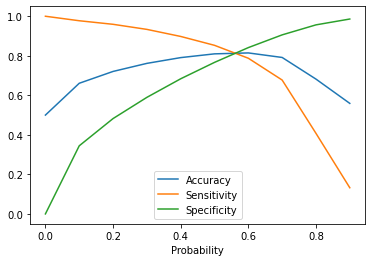

In [109]:
# Let's plot accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

__It is observed that the point nearer to 0.6 is the optimal threshold point for getting optimal accuracy, sensitivity and specificity. Lets take 0.57 as the optimal cut-off and proceed.__

In [110]:
y_train_final_df['Predicted_churn'] = y_train_final_df.Predicted_churn_probability.map( lambda x: 1 if x > 0.57 else 0)
y_train_final_df.head()

,CustID,churn_probability,Predicted_churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_churn
0,69999.0,0,0.025759,1,0,0,0,0,0,0,0,0,0,0
1,70000.0,0,0.595927,1,1,1,1,1,1,0,0,0,0,1
2,70001.0,0,0.740131,1,1,1,1,1,1,1,1,0,0,1
3,70002.0,0,0.479417,1,1,1,1,1,0,0,0,0,0,0
4,70003.0,0,0.285887,1,1,1,0,0,0,0,0,0,0,0


In [111]:
# Confusion matrix for train data
confusion = metrics.confusion_matrix(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)
confusion

array([[50911, 11194],
       [11865, 50240]], dtype=int64)

- __Our business problem is to find out customers who are likely to churn and hence it is sensitive that we must reduce FALSE NEGATIVES compared to false positives.__
- __Sensitivity is more important than specificity in our case.__
- __If accuracy can be compromised, then it is best to choose 0.4 as cut-off value as it reduces the false negative rate, thereby customers who are likely to churn are not missed out.__

In [112]:
# Accuracy of the train data predictions

metrics.accuracy_score(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)

0.8143547218420417

In [113]:
# Function to draw ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

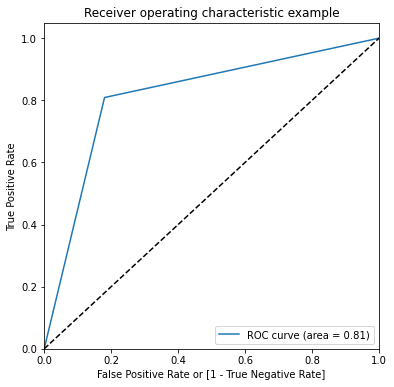

(array([0.        , 0.18024314, 1.        ]),
 array([0.        , 0.80895258, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [114]:
# ROC curve for train data predictions

draw_roc(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)

__As we can see the area covered under the curve is 0.81__

#### PRECISION AND RECALL

In [115]:
# Precision score

precision_score(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)

0.8177881954617964

In [116]:
# Recall score

recall_score(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)

0.8089525803075437

In [117]:
# Precision recall curve

p, r, thresholds = precision_recall_curve(y_train_final_df.churn_probability, y_train_final_df.Predicted_churn)

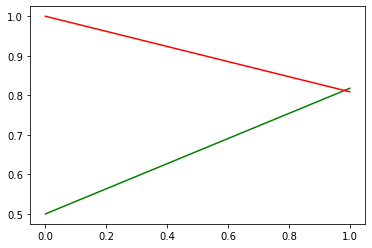

In [118]:
# Plot precision_recall_curve

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

__For our business objective, recall is more important as we dont want to miss out the customers those who are likely to churn.__

In [119]:
# Function which takes in probability as array and returns the dataframe of predicted churn values based on the the cut off
# Optimal cut-off = 0.57 is obtained from plotting probabiity, sensitivity and specificity

def predicted_array_to_dataframe(y_test_prob_arr):
    y_test_pred_df = pd.DataFrame(y_test_prob_arr)
    y_pred_df = y_test_pred_df.iloc[:,[1]]
    y_pred_df = y_pred_df.rename(columns={1 :'churn_prob'})
    y_pred_df['id'] = cust_id.astype('int64')
    y_pred_df['churn_probability'] = y_pred_df.churn_prob.map( lambda x: 1 if x > 0.57 else 0)
    y_pred_df = y_pred_df.drop("churn_prob", axis = 1)
    return y_pred_df

In [120]:
# Make predictions on test data

y_test_pred = logistic_regression.predict_proba(X_test[cols_selected_by_rfe])

In [121]:
# Convert the probability array to dataframe containing class values

y_test_prediction = predicted_array_to_dataframe(y_test_pred)
y_test_prediction.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [122]:
# Write the predicted class values with 'id' in a ''.csv' file

y_test_prediction.to_csv(r'sample (1).csv', index=False)

### Getting PCA components

In [123]:
# Instantiate PCA object

pca = PCA(random_state=42)

In [124]:
# Fit pca on the train data

pca.fit(X_train)

PCA(random_state=42)

In [125]:
# Components of PCA

pca.components_

array([[ 7.14337621e-02,  8.91599137e-02,  9.37313517e-02, ...,
         9.99630625e-02,  5.66435482e-02,  2.46176021e-01],
       [ 3.26409481e-01,  4.87165508e-01,  4.29321921e-01, ...,
        -4.04410109e-02, -2.06099173e-02, -2.62230874e-02],
       [-5.80603144e-02, -1.06325764e-01, -1.04844250e-01, ...,
        -6.24612287e-02, -4.40233642e-02,  1.17701624e-02],
       ...,
       [ 9.72517837e-04, -5.81415254e-05, -1.60429241e-04, ...,
         2.25386131e-04,  6.52307658e-04, -7.98862930e-04],
       [ 6.84074242e-05, -2.40405921e-04,  1.95878257e-04, ...,
        -6.37204022e-04,  3.28304393e-04, -2.92245186e-04],
       [-2.91233233e-07,  9.16619117e-09, -6.76163048e-07, ...,
         1.48192784e-06, -2.40857392e-07,  3.10529721e-06]])

In [126]:
# Explained_variance_ratio

pca.explained_variance_ratio_

array([1.03489649e-01, 7.44328242e-02, 6.21140342e-02, 4.09633018e-02,
       3.72609155e-02, 3.26541547e-02, 2.92648701e-02, 2.81305577e-02,
       2.65053505e-02, 2.38815731e-02, 2.35114716e-02, 2.28894655e-02,
       2.10434282e-02, 1.89238499e-02, 1.76731160e-02, 1.74400982e-02,
       1.72573402e-02, 1.59081841e-02, 1.40481224e-02, 1.38335959e-02,
       1.36718184e-02, 1.28863855e-02, 1.27395702e-02, 1.23782646e-02,
       1.21490505e-02, 1.13174120e-02, 1.07384442e-02, 1.03362053e-02,
       9.87141059e-03, 9.57728675e-03, 9.28779837e-03, 9.00286918e-03,
       8.55313971e-03, 8.16908710e-03, 7.99000594e-03, 7.66348900e-03,
       7.46424699e-03, 7.07139871e-03, 6.49932962e-03, 6.39015497e-03,
       6.28119878e-03, 6.16494671e-03, 6.02691610e-03, 5.91878680e-03,
       5.75098346e-03, 5.64658567e-03, 5.44994210e-03, 5.27857946e-03,
       4.97262127e-03, 4.70892072e-03, 4.55934956e-03, 4.34746416e-03,
       4.30213994e-03, 3.81475245e-03, 3.68620299e-03, 3.66387591e-03,
      

In [127]:
# Cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

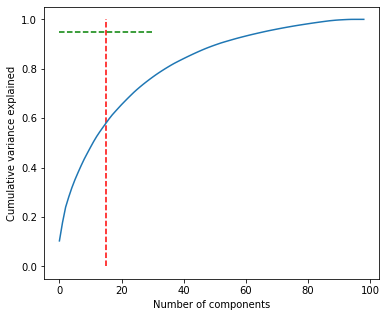

In [128]:
# Plot the Scree-plot

fig = plt.figure(figsize=[6,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.show()

__We can see that the optimal number of PCA components is around 18 that can explain enough variance in the data.__

In [129]:
# Apply PCA with 18 components

pca_logistic_1 = IncrementalPCA(n_components=18)

In [130]:
# Fit PCA on the training data

df_train_pca1 = pca_logistic_1.fit_transform(X_train)

In [131]:
# Shape of the training data

df_train_pca1.shape

(124210, 18)

In [132]:
# Correlation matrix

corrmat = np.corrcoef(df_train_pca1.transpose())

In [133]:
# Shape of the correlation matrix

corrmat.shape

(18, 18)

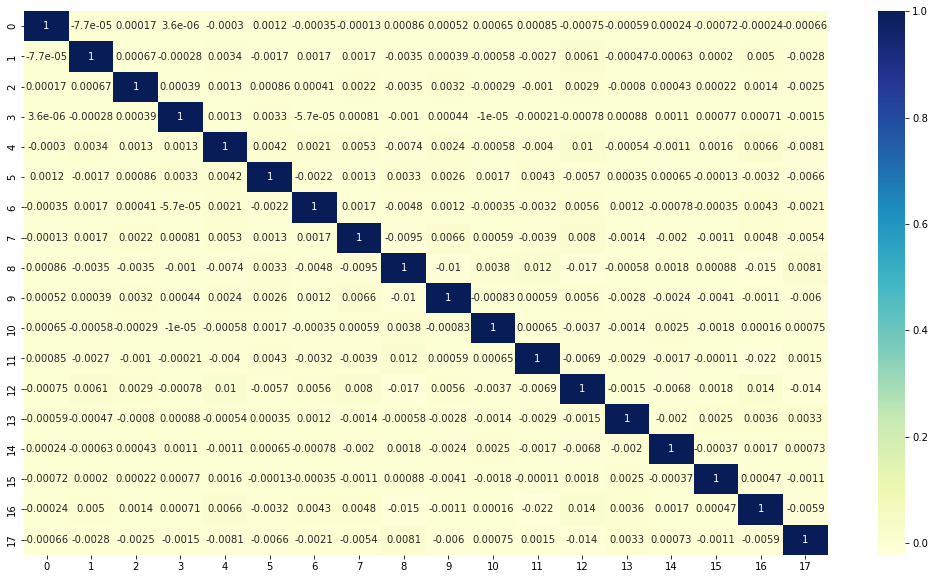

In [134]:
# Plot heatmap for the 18 selected components

plt.figure(figsize=[18,10])
sns.heatmap(corrmat, annot=True, cmap = "YlGnBu")
plt.show()

__All of the predictors are uncorrelated with each other, they have a correlation value nearer to 0. This implies that Multicollinearity is well handled by PCA.__

In [135]:
# Transform the fitted PCA components on test data as well

df_test_pca1 = pca_logistic_1.transform(X_test)
df_test_pca1.shape

(30000, 18)

### MODEL 2

In [136]:
# Instantiate LogisticRegression object

logistic_pca_1 = LogisticRegression()

In [137]:
# Fit the model with the selected PCA components

logistic_model_pca1 = logistic_pca_1.fit(df_train_pca1, y_train)

In [138]:
# Make predictions on the train data to check area under the curve

y_train_probability = logistic_model_pca1.predict_proba(df_train_pca1)

In [139]:
# Check area under the curve

"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_probability[:,1]))

'0.84'

- __As we can see that applying logistic regression with PCA is much better than applying it without PCA.__
- __Here the AUC is 0.84 with only 18 components which is good compared to the previous model where AUC was 0.81 with 99 features.__

In [140]:
# Make predictions on the test data containing 18 PCA components

y_test_probability = logistic_model_pca1.predict_proba(df_test_pca1)

In [141]:
# Convert the probability array to dataframe containing class values

y_test_prediction = predicted_array_to_dataframe(y_test_probability)
y_test_prediction.head()

,id,churn_probability
0,69999,1
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [142]:
# Write the predicted class values with 'id' in a ''.csv' file

y_test_prediction.to_csv(r'sample (2).csv', index=False)

### Getting number of PCA components that explains 90% variance in the training data

In [143]:
# Instantiate PCA object with 90% variance requirement

pca_logistic_2 = PCA(0.9)

In [144]:
# Fit on the train data

df_train_pca2 = pca_logistic_2.fit_transform(X_train)

In [145]:
# Shape of the train dataframe

df_train_pca2.shape

(124210, 52)

__52 components are selected by PCA which explains 90% variance in the training data.__

### MODEL 3

In [146]:
# Instantiate LogisticRegression() object

logistic_pca_2 = LogisticRegression()

In [148]:
# Fit the model on train data containing 52 components

logistic_model_pca2 = logistic_pca_2.fit(df_train_pca2, y_train)

In [149]:
# Transform the fitted 52 components on the test data as well

df_test_pca2 = pca_logistic_2.transform(X_test)

In [150]:
# Shape of the test dataframe

df_test_pca2.shape

(30000, 52)

In [151]:
# Make predictions on train data to check AUC

y_train_probability = logistic_model_pca2.predict_proba(df_train_pca2)[:,1]

In [152]:
# Check AUC for the train data

"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_probability))

'0.87'

__AUC is 0.87 for this model which is better but still this is not a significant increase when compared to previous model for which AUC was 0.84 with only 18 components.__

In [154]:
# Make predictions on the test data containing 52 PCA components

y_test_probability = logistic_model_pca2.predict_proba(df_test_pca2)

In [155]:
# Convert the probability array to dataframe containing class values

y_test_prediction = predicted_array_to_dataframe(y_test_probability)
y_test_prediction.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [156]:
# Write the predicted class values with 'id' in a ''.csv' file

y_test_prediction.to_csv(r'sample (3).csv', index=False)

### Hyper Parameter Tuning for RandomForestClassifier 

In [157]:
# Instantiate RandomForestClassifier() object

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [158]:
# Assign values to parameters

params = {
    'max_depth': [20,50,100,200],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100,200,500]
}

In [159]:
# GridSearchCV 

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [151]:
# Fit the grid_search on train data to try various combinations of parameters and obtain the best one

%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Wall time: 32min 53s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 50, 100, 200],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=1)

In [178]:
# Best score

grid_search.best_score_

In [153]:
# Best Estimator

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [177]:
# PLot ROC curve for the best estimator

plot_roc_curve(rf_best, X_train, y_train)
plt.show()

__AUC is 1.00 which is best compared to previous models.__

### MODEL 4

In [162]:
# Lets now make a random forest model with the best estimators that we obtained as a result of tuning

rf1 = RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=500, 
                             n_jobs=-1, random_state=42, oob_score = True )

In [165]:
# Fit the model on train data

%%time
rf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42)

In [203]:
rf1.feature_importances_

array([1.02880878e-02, 3.16620369e-02, 1.11695932e-01, 1.22397231e-02,
       2.87720990e-02, 1.10669957e-01, 5.62202584e-03, 7.31316429e-03,
       3.03872894e-03, 3.53201130e-03, 5.79158670e-03, 2.21190808e-03,
       3.93561009e-03, 1.97872031e-03, 3.00016574e-02, 1.06749082e-02,
       8.68801258e-03, 6.85367791e-03, 8.68873480e-03, 9.06696642e-03,
       5.37002667e-03, 9.18268641e-04, 1.04706527e-03, 7.18635467e-04,
       1.60813192e-03, 6.95424002e-03, 1.27004629e-02, 5.73232049e-03,
       4.07001443e-03, 6.41778404e-06, 1.28307766e-04, 5.97911370e-03,
       6.81322749e-03, 2.55807793e-02, 5.80727212e-03, 2.55057477e-02,
       6.80811014e-03, 5.11632452e-02, 4.63429143e-03, 5.66175184e-03,
       1.30395742e-02, 7.42179557e-03, 7.33691949e-03, 3.85339048e-03,
       5.99864588e-03, 6.24827925e-03, 6.41086194e-03, 1.89365768e-03,
       1.80505332e-03, 2.87819304e-03, 7.75706203e-03, 6.14580974e-02,
       2.27562133e-03, 1.40305264e-03, 9.04803023e-03, 2.32585927e-03,
      

In [204]:
# Lets make a dataframe of features and their corresponding importances in descending order
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": rf1.feature_importances_
})

In [206]:
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
2,roam_ic_mou_8,0.111696
5,roam_og_mou_8,0.110670
51,total_ic_mou_8,0.061458
97,day_of_last_rech_8,0.052524
37,loc_ic_t2m_mou_8,0.051163
72,last_day_rch_amt_8,0.038531
1,roam_ic_mou_7,0.031662
14,loc_og_mou_8,0.030002
4,roam_og_mou_7,0.028772
69,max_rech_amt_8,0.026106


In [166]:
# Out of Bag error score

rf1.oob_score_

0.9588036389984703

In [167]:
# Make predictions on train data

y_tr_probability = rf1.predict_proba(X_train)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

0.9843651879880847

In [168]:
# Make predictions on the test data 

y_test_probability = rf1.predict_proba(X_test)

In [169]:
# Convert the probability array to dataframe containing class values

y_test_prediction = predicted_array_to_dataframe(y_test_probability)
y_test_prediction.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [170]:
# Write the predicted class values with 'id' in a ''.csv' file

y_test_prediction.to_csv(r'sample (4).csv', index=False)

### Hyper Parameter Tuning for RandomForestClassifier having 18 PCA components

In [171]:
# Instantiate RandomForestClassifier() object

rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)

In [172]:
# Assign values to parameters

params = {
    'max_depth': [50,70,100],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100,500,800]
}

In [173]:
# Grid search CV

grid_search = GridSearchCV(estimator=rf_pca,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [242]:
# Fit the grid_search on train data to try various combinations of parameters and obtain the best one

%%time
grid_search.fit(df_train_pca1, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Wall time: 42min 37s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [50, 100, 500, 800]},
             scoring='accuracy', verbose=1)

In [244]:
# Best score

grid_search.best_score_

0.9027050786302394

In [245]:
# Best estimator

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=800,
                       n_jobs=-1, random_state=42)

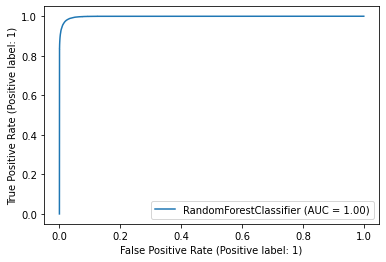

In [246]:
# PLot ROC curve for the best estimator

plot_roc_curve(rf_best, df_train_pca1, y_train)
plt.show()

__AUC is 1.00 like the previous random forest model.__

### MODEL 5

In [174]:
# Lets now build a model with the best estimators obtained from tuning parameters

rf2 = RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=800,
                                   n_jobs=-1, random_state=42, oob_score=True)

In [176]:
# Fit the model on train data

%%time
rf2.fit(df_train_pca1, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=5, n_estimators=800,
                       n_jobs=-1, oob_score=True, random_state=42)

In [181]:
# Out of Bag error score

rf2.oob_score_

0.9196441510345383

In [182]:
# Make predictions on train data

y_tr_probability = rf2.predict_proba(df_train_pca1)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

0.976274052008695

In [183]:
# Make predictions on the test data 

y_test_probability = rf2.predict_proba(df_test_pca1)

In [184]:
# Convert the probability array to dataframe containing class values

y_test_prediction = predicted_array_to_dataframe(y_test_probability)
y_test_prediction.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [185]:
# Write the predicted class values with 'id' in a ''.csv' file

y_test_prediction.to_csv(r'sample (5).csv', index=False)

### MODEL 6

In [186]:
# Lets first apply 'xgboost' without any exclusive specification of parameters
# Instantiate XGBClassifier() object

xgb_cfl = xg_boost.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [187]:
# Fit the xgboost classifier object on train data

xgb_cfl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [188]:
# Make predictions on train data

y_tr_probability = xgb_cfl.predict_proba(X_train)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

0.9845181547379438

In [189]:
# Make predictions on test data

xgb_test_predictions_prob = xgb_cfl.predict_proba(X_test)

In [190]:
# Convert the probability array to dataframe containing class values

xgb_test_pred = predicted_array_to_dataframe(xgb_test_predictions_prob)
xgb_test_pred.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [191]:
# Write the predicted class values with 'id' in a ''.csv' file

xgb_test_pred.to_csv(r'sample (6).csv', index=False)

### Hyper Parameter Tuning for XGBoostClassifier

In [192]:
# Instantiate XGBoostClassifier() object

xgb_cf2 = xg_boost.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [193]:
# Assign values to parameters

params = {
        'n_estimators' : [200, 500], 
        'learning_rate' : [0.1, 0.25, 0.3],  
        'gamma': [0.5, 0.7, 1.0]
        }

In [319]:
# RandomizedSearchCV

random_search = RandomizedSearchCV(xgb_cf2, param_distributions=params, n_iter=20, scoring='accuracy', 
                                   n_jobs=-1, cv=3, verbose=3, random_state=0)

### MODEL 7

In [320]:
# Fit the best estimator on the train data

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'gamma': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.1, 0.25, 0.3],
                                        'n_estimators': [200, 500]},
                   random_state=0, scoring='accuracy', verbose=3)

In [321]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy : ')
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy : 
0.9574515564635027

 Best hyperparameters:
{'n_estimators': 500, 'learning_rate': 0.25, 'gamma': 0.5}


In [ ]:
# Make predictions on train data

y_tr_probability = random_search.predict_proba(X_train)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

In [322]:
# Make predictions on the test data

xgb_test_predictions = random_search.predict_proba(X_test)

In [323]:
# Convert the probability array to dataframe containing class values

xgb_pred_df = predicted_array_to_dataframe(xgb_test_predictions)
xgb_pred_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [324]:
# Write the predicted class values with 'id' in a ''.csv' file

xgb_pred_df.to_csv(r'sample (7).csv', index = False)

### MODEL 8

In [194]:
# Lets first apply 'xgboost' without any exclusive specification of parameters (using 18 PCA components as features)
# Instantiate XGBClassifier() object

xgb_cf_pca = xg_boost.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cf_pca.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [195]:
# Fit the xgboost classifier object on PCA train data

xgb_cf_pca.fit(df_train_pca1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [196]:
# Make predictions on train data

y_tr_probability = xgb_cf_pca.predict_proba(df_train_pca1)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

0.8932050559536269

In [197]:
# Make predictions on the PCA test data

xgb_test_predictions_probability = xgb_cf_pca.predict_proba(df_test_pca1)

In [198]:
# Convert the probability array to dataframe containing class values

xgb_test_pred_df = predicted_array_to_dataframe(xgb_test_predictions_probability)
xgb_test_pred_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [199]:
# Write the predicted class values with 'id' in a ''.csv' file

xgb_test_pred_df.to_csv(r'sample (8).csv', index=False)

### Hyper Parameter Tuning for XGBoostClassifier having 18 PCA components

In [200]:
# Instantiate XGBoostClassifier() object

xgb_cf_pca_tune = xg_boost.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

In [207]:
# Assign values to parameters

params = {
        'n_estimators' : [200, 400, 500], 
        'learning_rate' : [0.2, 0.3],  
        'gamma': [0.25, 0.5, 0.75, 1.0]
        }

In [208]:
# RandomizedSearchCV

random_search_pca = RandomizedSearchCV(xgb_cf2, param_distributions=params, n_iter=10, scoring='accuracy', 
                                   n_jobs=-1, cv=3, verbose=3, random_state=0)

### MODEL 9

In [209]:
# Fit the best estimator on the train data

random_search_pca.fit(df_train_pca1, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.25, 0.5, 0.75, 1.0],
                                        'learning_rate': [0.2, 0.3],
                                        'n_estimators': [200, 400, 500]},
                   random_state=0, scoring='accuracy', verbose=3)

In [210]:
print('\n Best estimator:')
print(random_search_pca.best_estimator_)
print('\n Best accuracy : ')
print(random_search_pca.best_score_ )
print('\n Best hyperparameters:')
print(random_search_pca.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 Best accuracy : 
0.905055950503438

 Best hyperparameters:
{'n_estimators': 500, 'learning_rate': 0.3, 'gamma': 0.5}


In [211]:
# Make predictions on train data

y_tr_probability = random_search_pca.predict_proba(df_train_pca1)
y_tr_prediction = predicted_array_to_dataframe(y_tr_probability)
accuracy_score(y_train,y_tr_prediction.churn_probability)

0.9793172852427341

In [212]:
# Make predictions on the test data

xgb_pred_pca_tune = random_search_pca.predict_proba(df_test_pca1)

In [213]:
# Convert the probability array to dataframe containing class values

xgb_pca_tune_df = predicted_array_to_dataframe(xgb_pred_pca_tune)
xgb_pca_tune_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [214]:
# Write the predicted class values with 'id' in a ''.csv' file

xgb_pca_tune_df.to_csv(r'sample (9).csv', index = False)

### Insights obtained :

- __Totally 9 models are built and predictions are made on the test and training data as well.__<br><br>

- __Model 1 : Basic Logistic Regression model using RFE__<br>
    - Accuracy for train data : 0.81
    - Accuracy for test data : 0.79<br>
- __Model 2 : Logistic Regression with PCA components (optimal number = 18)__<br>
    - Accuracy for train data : 0.84
    - Accuracy for test data : 0.80<br>
- __Model 3 : Logistic Regression with PCA components (90% variance explained using 52 components)__<br>
    - Accuracy for train data : 0.87
    - Accuracy for test data : 0.79<br>
- __Model 4 : Random Forest model with tuned hyper parameters__<br>
    - Accuracy for train data : 0.98
    - Accuracy for test data : 0.90<br>
- __Model 5 : Random Forest model using 18 PCA components with tuned hyper parameters__<br>
    - Accuracy for train data : 0.97
    - Accuracy for test data : 0.89<br>
- __Model 6 : Basic XGBoost classifier model without any tuned hyper parameters__<br>
    - Accuracy for train data : 0.98
    - Accuracy for test data : 0.90<br>
- __Model 7 : XGBoost classifier model with tuned hyper parameters__<br>
    - Accuracy for train data : 0.99
    - Accuracy for test data : 0.91<br>
- __Model 8 : XGBoost classifier model using 18 PCA components without tuned parameters__<br>
    - Accuracy for train data : 0.89
    - Accuracy for test data : 0.84<br>
- __Model 9 : XGBoost classifier model using 18 PCA components with tuned hyper parameters__<br>
    - Accuracy for train data : 0.97
    - Accuracy for test data : 0.89

- If accuracy is the important metric, i.e., if prediction is important, then we can choose the __'Model : 7'__, where we have more accuracy rate but with 99 features.
- On the other hand, __'Model : 5'__ & __'Model : 9'__ use only 18 PCA components as dimensions but their accuracy rate is decently good with minimal number of predictors.
- Our business objective is more sensitive towards __prediction of churning out__ of customers. Hence we should choose a cut-off value such that __False negative rates are at the least__. Sensitivity and recall should be sufficiently higher for the model so that it doesnot miss out any customers likely to be churned out.

### Feature Importances and its significance obtained from Random forest :

__10 most important features selected by random forest classifier are :__

- __roam_ic_mou_8__	(0.111696)
- __roam_og_mou_8__	(0.110670)
- __total_ic_mou_8__	(0.061458)
- __day_of_last_rech_8__	(0.052524)
- __loc_ic_t2m_mou_8__	(0.051163)
- __last_day_rch_amt_8__	(0.038531)
- __roam_ic_mou_7__	(0.031662)
- __loc_og_mou_8__	(0.030002)
- __roam_og_mou_7__	(0.028772)
- __max_rech_amt_8__	(0.026106)

__It is evident that 'August' month data plays a significant role in predicting whether a customer is likely to churn out or not.__

### Significant features selected by RFE in Logistic regression model:

- roam_og_mou_8
- loc_og_t2t_mou_6
- loc_og_mou_8
- std_og_t2t_mou_6
- total_og_mou_8
- loc_ic_t2m_mou_8
- spl_ic_mou_8
- monthly_3g_8
- vol_3g_mb_8
- day_of_last_rech_8
- sachet_3g_8
- std_ic_t2f_mou_8
- spl_og_mou_8
- high_value_customers

__Here also, it is observed that most of the features from the month 'August' seem to play a key role in prediction__